### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [2]:
def bubble_sort(nums):

    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
    #             print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:

                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх
                
                
def selection_sort(nums):

    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



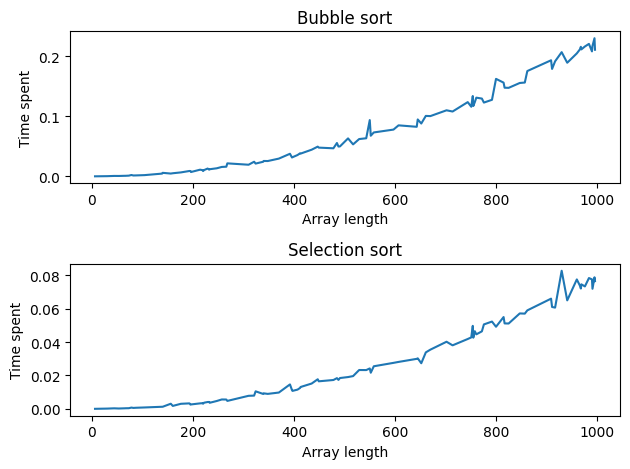

In [34]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

bubble_results = {}
selection_results = {}

for i in range(100):
    random_array = np.random.randint(np.random.randint(1000), size=np.random.randint(1000))
    copy_random_array = np.copy(random_array)
    if len(random_array) == len(copy_random_array):
        bubble_time = timeit.timeit(lambda: bubble_sort(random_array), number=1)
        selection_time = timeit.timeit(lambda: selection_sort(copy_random_array), number=1)
        bubble_results[len(random_array)] = bubble_time
        selection_results[len(copy_random_array)] = selection_time
    else:
        continue

fig, axs = plt.subplots(2)

axs[0].plot(*zip(*sorted(bubble_results.items())))
axs[0].set_title('Bubble sort')
axs[0].set_xlabel('Array length')
axs[0].set_ylabel('Time spent')

axs[1].plot(*zip(*sorted(selection_results.items())))
axs[1].set_title('Selection sort')
axs[1].set_xlabel('Array length')
axs[1].set_ylabel('Time spent')
fig.tight_layout()
plt.show()


### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

In [117]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
    return x[0]**2.0


# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]

In [123]:
bounds = asarray([[-5.0, 5.0]])

n_iterations = 1000

initial_temperatures = [1, 10, 100, 1000]
step_sizes = [0.1, 0.5, 1.0]

for temp in initial_temperatures:
    for step_size in step_sizes:
        print(f"Experiment with initial temperature = {temp}, step size = {step_size}")
        best, best_eval = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
        print(f"Best solution: f({best}) = {best_eval}\n")

Experiment with initial temperature = 1, step size = 0.1
>0 f([-3.2062872]) = 10.28028
>2 f([-3.20594722]) = 10.27810
>3 f([-3.17502242]) = 10.08077
>5 f([-3.09499088]) = 9.57897
>6 f([-3.06865396]) = 9.41664
>7 f([-2.94323428]) = 8.66263
>10 f([-2.92460294]) = 8.55330
>14 f([-2.86523572]) = 8.20958
>17 f([-2.84276866]) = 8.08133
>22 f([-2.74193903]) = 7.51823
>26 f([-2.67996152]) = 7.18219
>27 f([-2.65606055]) = 7.05466
>29 f([-2.63776832]) = 6.95782
>31 f([-2.62821265]) = 6.90750
>33 f([-2.60099055]) = 6.76515
>35 f([-2.59412511]) = 6.72949
>37 f([-2.53862326]) = 6.44461
>39 f([-2.41324028]) = 5.82373
>42 f([-2.21581676]) = 4.90984
>43 f([-2.18415893]) = 4.77055
>45 f([-2.10685751]) = 4.43885
>49 f([-1.98799321]) = 3.95212
>50 f([-1.85618308]) = 3.44542
>52 f([-1.69671629]) = 2.87885
>53 f([-1.58411751]) = 2.50943
>55 f([-1.54148035]) = 2.37616
>57 f([-1.4025688]) = 1.96720
>60 f([-1.27898678]) = 1.63581
>71 f([-1.22608272]) = 1.50328
>74 f([-1.13593359]) = 1.29035
>77 f([-1.08302504

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [35]:
# импортируем библиотеку для доступа к файлам в интернете
import requests
# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

In [62]:
import re

emails = re.findall(pattern='(?<=Author: )(.*)(?=\n)', string=mbox)

print(f'Больше всего писем написал {max(emails)}, а именно он написал {emails.count(max(emails))} писем')

Больше всего писем написал zqian@umich.edu, а именно он написал 195 писем


### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

In [102]:
roman_numbers = {
    'I': 1, 'V': 5,'X': 10,
    'L': 50,'C': 100,'D': 500,'M': 1000
    }

def rimskaya_imperiya (roman_number : str) -> int:
    result = 0
    prev_value = 0
    for i in roman_number[::-1]:
        value = roman_numbers[i]
        if value < prev_value:
            result -= value
        else:
            result += value
        prev_value = value
        
    return print(result)

rimskaya_imperiya('IVXLCDM')

334


### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [86]:
import time

def wrapper (function):
    print("The name of function is : " + function.__qualname__)
    time.sleep(3)
    function()

@wrapper
def alone_func():
    print("I'm main function here!")

The name of function is : alone_func
I'm main function here!


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


## Пример - MSE

In [103]:
from typing import List

def mse(prediction:List[float], 
        actual_values:List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i])**2 for i in range(N))/N
    
    return mse

In [105]:
a = [1,2,3,4,5]
b = [1,2,3,10,6]

mse(a,b)  # == (6**2 + 1)/5

7.4

Аналогичным образом реализуйте следующий список функций ошибок:

**~~RMSE~~, LogLoss, HueberLoss, ~~MAE~~, ~~MAPE~~, ~~sMAPE~~, ~~log-cosh loss~~, quantile loss  :)** 

Вопросы можно задавать

In [106]:
from math import sqrt

def rmse(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)

    N = len(prediction)
    rmse = sqrt(sum((prediction[i] - actual_values[i])**2 for i in range(N))/N)

    return rmse

rmse(a,b)

2.7202941017470885

In [107]:
def mae(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mae = sum(abs(prediction[i] - actual_values[i]) for i in range(N))/N

    return mae

mae(a,b)

1.4

In [111]:
def mape(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    mape = sum(abs(actual_values[i] - prediction[i])/actual_values[i] for i in range(N))/N

    return print(f'{round(mape*100, 2)} %')

mape(a,b)

15.33 %


In [115]:
def smape(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    smape = (sum((abs(prediction[i] - actual_values[i])/((abs(actual_values[i]) + abs(prediction[i]))/2)) for i in range(N)))/N

    return print(f'{round(smape*100, 2)} %')

smape(a,b)

20.78 %


In [116]:
from math import cosh, log

def log_cosh_loss(prediction:List[float], 
        actual_values:List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    log_cosh_loss = sum(log(cosh(prediction[i] - actual_values[i])) for i in range(N))

    return log_cosh_loss

log_cosh_loss(a,b)

5.740639794116559